In [1]:
from utils.common_imports import *

In [5]:
# Source: https://www.via.cornell.edu/lidc/
# NOTE: this file is created in 2011, so the data is old
df = pd.read_csv("data/nodule_size_list.csv")
df.head()

,case,scan,roi,volume,eq. diam.,x loc.,y loc.,slice no.,Unnamed: 8,nodIDs,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,3000566,1,6459.75,23.107,317,367,43,NaN,IL057_127364,Nodule 001,MI014_12127,0,NaN,NaN,NaN
1,2,3000522,1,6663.44,23.347,345,361,77,NaN,8,MI014_11691,NaN,NaN,NaN,NaN,NaN
2,3,3000611,1,408.79,9.208,308,198,57,NaN,Nodule 003,IL057_130602,8,MI014_16599,NaN,NaN,NaN
3,3,3000611,2,1165.82,13.058,221,219,56,NaN,IL057_130598,Nodule 002,9,MI014_16595,NaN,NaN,NaN
4,3,3000611,3,4989.64,21.201,367,350,65,NaN,0,IL057_130591,Nodule 001,MI014_16588,NaN,NaN,NaN


- **Volume**: The median of the volume estimates for that nodule; each volume estimate is computed by multiplying the number of voxels included in the nodule region by the voxel volume. The units are $mm^3$.
- **Eq. diam.**: the equivalent diameter of the nodule <br>
    - I. e. the diameter of the sphere having the same volume as the nodule estimated volume. The units of the diameter are mm.

In [53]:
print(f"There are {sum(df['eq. diam.'] >= 3) / len(df):.2%} nodules with eq. diameter >= 3mm")
small_nodules = df.query("`eq. diam.` < 3")
print(f"That is {len(small_nodules)} nodules with eq. diameter < 3mm")
display(small_nodules[df.columns[:8]])

There are 98.60% nodules with eq. diameter >= 3mm
That is 37 nodules with eq. diameter < 3mm


,case,scan,roi,volume,eq. diam.,x loc.,y loc.,slice no.
769,297,1530,1,13.17,2.930,123,133,257
1129,433,30056,3,12.52,2.881,118,368,186
1204,458,0,2,9.82,2.657,419,345,128
1271,479,30894,3,12.82,2.904,190,350,205
1294,487,4155,1,13.83,2.978,165,101,204
1395,524,1905,1,12.64,2.890,135,171,166
1398,524,1905,4,9.88,2.662,61,271,117
1424,535,30033,1,9.25,2.604,388,320,102
1427,535,30033,4,10.28,2.698,326,410,107
1428,535,30033,5,8.22,2.504,116,328,92


eq. diam.
(1.966, 8.672]      2063
(8.672, 15.312]      377
(15.312, 21.952]     141
(21.952, 28.592]      43
(28.592, 35.232]       8
(35.232, 41.871]       2
(41.871, 48.511]       0
(48.511, 55.151]       0
(55.151, 61.791]       0
(61.791, 68.431]       1
Name: count, dtype: int64

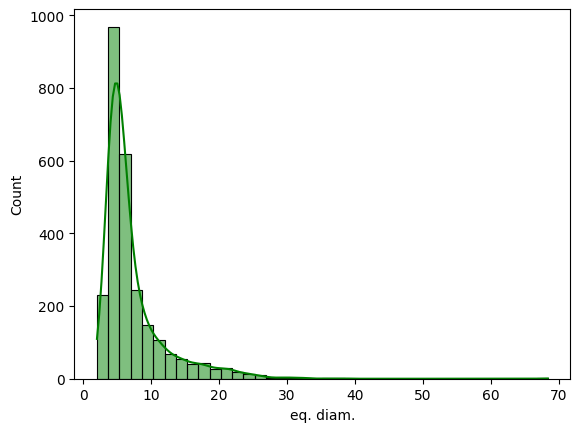

In [63]:
display(pd.cut(df["eq. diam."], bins=10).value_counts().sort_index())
sns.histplot(df["eq. diam."], kde=True, bins=40, color="green", edgecolor="black")
plt.show()

In [62]:
# bin the volume column into 10 bins and show value counts
display(pd.cut(df["volume"], bins=10).value_counts().sort_index())
df.query("volume > 151011")
# NOTE: there is a scan with a huuuuge volume

volume
(-163.395, 16782.933]       2629
(16782.933, 33561.476]         5
(33561.476, 50340.019]         0
(50340.019, 67118.562]         0
(67118.562, 83897.105]         0
(83897.105, 100675.648]        0
(100675.648, 117454.191]       0
(117454.191, 134232.734]       0
(134232.734, 151011.277]       0
(151011.277, 167789.82]        1
Name: count, dtype: int64

,case,scan,roi,volume,eq. diam.,x loc.,y loc.,slice no.,Unnamed: 8,nodIDs,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
292,101,3192,1,167789.82,68.431,372,230,59,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


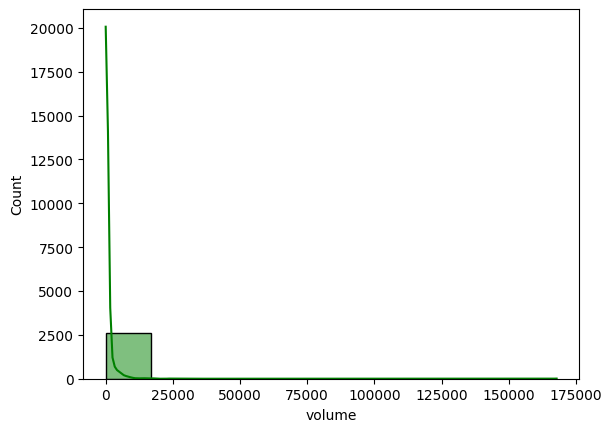

In [57]:
sns.histplot(df["volume"], kde=True, bins=10, color="green", edgecolor="black")
plt.show()